In [98]:
import torch
import torch.nn as nn

In [99]:
class tmpModel(nn.Module):
    def __init__(self,
                 in_vals=784):
        super().__init__()
        
        self.fc1 = nn.Linear(in_features=in_vals,
                             out_features=64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features=64,
                             out_features=16)
        self.fc3 = nn.Linear(in_features=16,
                             out_features=10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [100]:
import torchvision

In [101]:
import torchvision.transforms as transforms

In [102]:
transform = transforms.ToTensor()

In [103]:
data = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)

In [104]:
test_set = torchvision.datasets.MNIST(root='./data', download=True, train=False, transform=transform)

In [105]:
from torch.utils.data import DataLoader

In [106]:
train_loader = DataLoader(dataset=data,batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=64, shuffle=True)

In [107]:
model = tmpModel()

In [108]:
import torch.optim as optim

In [109]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(),lr=0.001)

In [110]:
epochs = 10

In [111]:
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for image, label in train_loader:
        optimizer.zero_grad()
        out = model(image)
        loss = loss_fn(out,label)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, pred = torch.max(out,1)
        correct += (pred == label).sum().item()
        total += label.size(0) 
    acc = correct/total
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader)}, Accuracy: {acc}")
    

Epoch 1/10, Loss: 0.4455399196952391, Accuracy: 0.87385
Epoch 2/10, Loss: 0.19338635280966632, Accuracy: 0.9448666666666666
Epoch 3/10, Loss: 0.14354143134935865, Accuracy: 0.9582166666666667
Epoch 4/10, Loss: 0.11634873375167518, Accuracy: 0.96535
Epoch 5/10, Loss: 0.09748019670336835, Accuracy: 0.9708333333333333
Epoch 6/10, Loss: 0.08436759393304777, Accuracy: 0.9748
Epoch 7/10, Loss: 0.0741387352497299, Accuracy: 0.97745
Epoch 8/10, Loss: 0.0650471365632815, Accuracy: 0.9802833333333333
Epoch 9/10, Loss: 0.0575143424147464, Accuracy: 0.98235
Epoch 10/10, Loss: 0.051273435083920876, Accuracy: 0.9847


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        out = model(images)
        _, pred = torch.max(out, 1)
        correct += (pred == labels).sum().item()  # Fix: Use "labels" (not "label")
        total += labels.size(0)

    acc = correct / total
    images, labels = images.to(device), labels.to(device)  # Fix: Move to GPU

print(f"Test Accuracy: {acc:.4f}")  # Display as a percentage

Test Accuracy: 0.9731


In [117]:
import matplotlib.pyplot as plt

In [121]:
def show_images(images, labels, num_images=10):
    plt.figure(figsize=(12,6))
    for i in range(num_images):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"Labels: {labels[i]}")
        plt.axis('off')
    plt.show

In [122]:
images, labels = next(iter(train_loader))

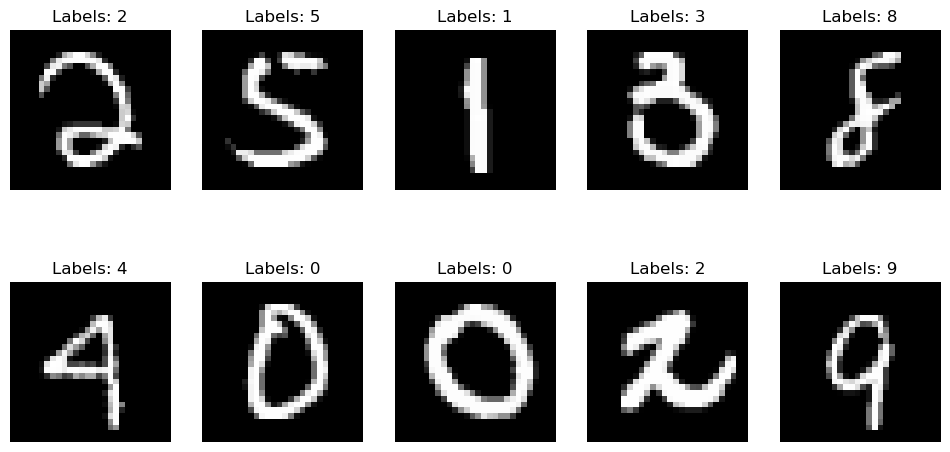

In [123]:
show_images(images, labels)